# Jonathan Halverson
# Tuesday, January 23, 2017
# NYC Stop and Frisk

Data obtained from http://www.nyc.gov/html/nypd/html/analysis_and_planning/stop_question_and_frisk_report.shtml

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('2015_sqf_csv.csv', header=0, parse_dates=['datestop'])

In [3]:
df.head(3).transpose()

,0,1,2
year,2015,2015,2015
pct,61,22,20
ser_num,18,5,36
datestop,1012015,1152015,1292015
timestop,315,1747,1745
recstat,1,A,1
inout,O,O,O
trhsloc,P,P,P
perobs,2,1,1
crimsusp,FELONY,FELONY,MISD


In [4]:
df[['age', 'weight', 'ht_feet', 'ht_inch', 'perobs']].describe()

,age,weight,ht_feet,ht_inch,perobs
count,22563.000000,22563.000000,22563.000000,22563.000000,22563.000000
mean,28.960555,171.360768,5.214333,6.259496,2.639144
std,34.621549,45.147912,0.423130,3.496789,7.120538
min,0.000000,1.000000,3.000000,0.000000,0.000000
25%,19.000000,150.000000,5.000000,4.000000,1.000000
50%,24.000000,170.000000,5.000000,7.000000,1.000000
75%,33.000000,185.000000,5.000000,9.000000,2.000000
max,999.000000,999.000000,7.000000,11.000000,535.000000


### Age

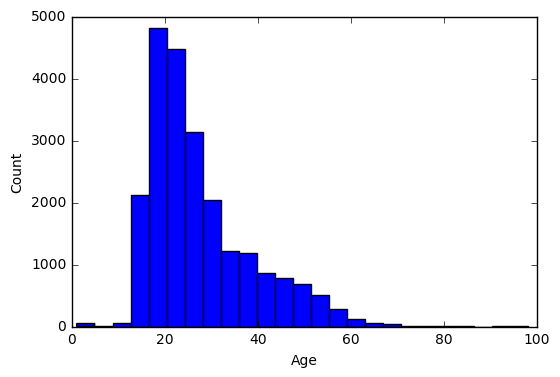

In [5]:
plt.hist(df[(df.age > 0) & (df.age < 99)].age, bins=25)
plt.xlabel('Age')
plt.ylabel('Count')

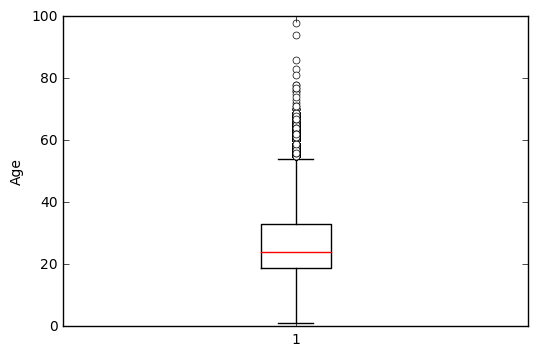

In [52]:
fprops = dict(marker='o', markerfacecolor='w', mec='k', markersize=5, linestyle='none', lw=1)
bprops = dict(color='k')
wprops = dict(color='k', linestyle='-', lw=1)
plt.boxplot(df[(df.age > 0) & (df.age < 99)].age, flierprops=fprops, boxprops=bprops, whiskerprops=wprops)
plt.ylabel('Age')

In [6]:
df[(df.age > 0) & (df.age < 99)].age.mean()

27.487440990469405

### Men vs. Women

In [8]:
gender = df['sex'].value_counts()
gender

M    20853
F     1515
Z      195
Name: sex, dtype: int64

In [9]:
gender['M'] / float(gender['F'])

13.764356435643565

### Race

In [10]:
s = df['race'].value_counts()
s

B    11950
Q     5090
W     2514
P     1409
A     1103
Z      298
U      122
I       77
Name: race, dtype: int64

In [11]:
race_labels = pd.read_csv('2015_sqf_file_spec_page2.csv', skiprows=4)
race_labels = race_labels[222:230]
race_labels

,Field Name,Value,Label
222,NaN,A,ASIAN/PACIFIC ISLANDER
223,NaN,B,BLACK
224,NaN,I,AMERICAN INDIAN/ALASKAN NATIVE
225,NaN,P,BLACK-HISPANIC
226,NaN,Q,WHITE-HISPANIC
227,NaN,W,WHITE
228,NaN,X,UNKNOWN
229,NaN,Z,OTHER


In [12]:
race = pd.merge(race_labels, s.to_frame(), how='inner', left_on='Value', right_index=True)
race

,Field Name,Value,Label,race
222,NaN,A,ASIAN/PACIFIC ISLANDER,1103
223,NaN,B,BLACK,11950
224,NaN,I,AMERICAN INDIAN/ALASKAN NATIVE,77
225,NaN,P,BLACK-HISPANIC,1409
226,NaN,Q,WHITE-HISPANIC,5090
227,NaN,W,WHITE,2514
229,NaN,Z,OTHER,298


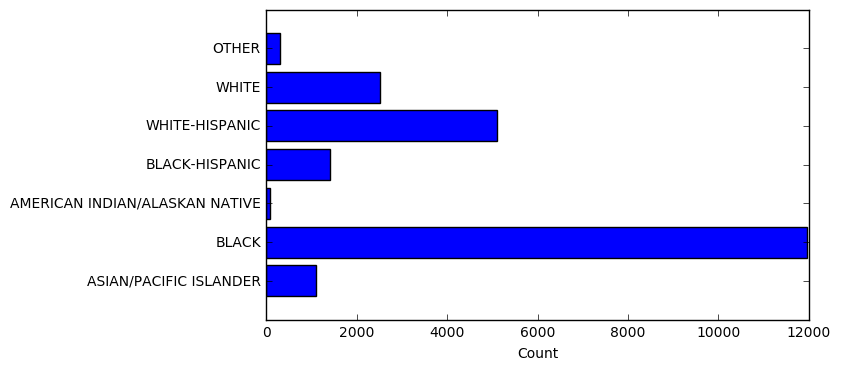

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7,4))
plt.barh(range(race.shape[0]), race.race, align='center')
plt.yticks(range(race.shape[0]), race.Label)
plt.xlabel('Count')

### Locations

In [21]:
x = pd.to_numeric(df[df['xcoord'] != ' ']['xcoord'])
y = pd.to_numeric(df[df['ycoord'] != ' ']['ycoord'])

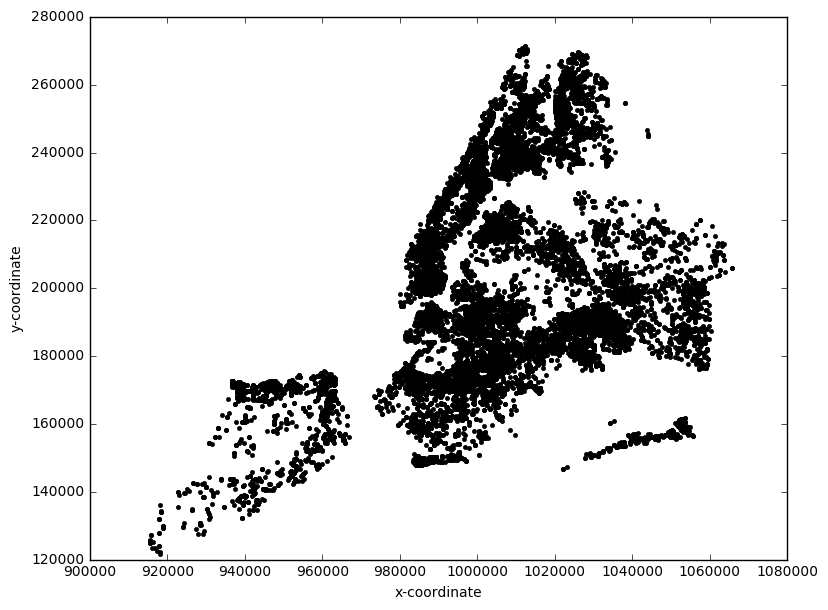

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9,7))
plt.plot(x, y, 'k.')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')